In [22]:
import os

# Check if the file exists in Colab
if os.path.exists('Time_series_analysis_and_forecast_DATASET.csv'):
    print("Dataset uploaded successfully.")
else:
    print("Dataset upload failed.")



Dataset uploaded successfully.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Loading the dataset from the root directory
dataFile = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

# Displaying the first few rows of the dataset
dataFile.head()


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Loading the dataset from the root directory
dataFile = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

# Converting the 'FullDate' column to a datetime object
dataFile['FullDate'] = pd.to_datetime(dataFile['FullDate'])

# Aggregating data on a daily basis (sum of electricity prices for each day)
daily_data = dataFile.resample('D', on='FullDate').sum().reset_index()

# Splitting the data into train and test sets (2757 days for train and the rest for test)
train_data = daily_data.iloc[:2757]
test_data = daily_data.iloc[2757:]

# Initializing the Prophet model
model = Prophet()

# Creating a new DataFrame for Prophet model with columns 'ds' and 'y'
prophet_data = train_data[['FullDate', 'ElecPrice']].rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'})

# Fitting the model to the training data
model.fit(prophet_data)

# Ensuring that test_data is not empty or contains valid rows
if not test_data.empty:
    # Creating a DataFrame for making predictions on the test set
    test_dates = test_data['FullDate'].values
    forecast_data = pd.DataFrame({'ds': test_dates})

    # Making predictions on the test set using the trained model
    forecast = model.predict(forecast_data)

    # Extracting actual and predicted values from the forecast DataFrame
    actual_prices = test_data['ElecPrice'].values
    predicted_prices = forecast['yhat'].values[-len(test_data):]

else:
    print("Test data is empty or contains no valid rows.")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/wihytutf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/6uvx5xpa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40450', 'data', 'file=/tmp/tmpblg7si5f/wihytutf.json', 'init=/tmp/tmpblg7si5f/6uvx5xpa.json', 'output', 'file=/tmp/tmpblg7si5f/prophet_model9iw2o8a5/prophet_model-20230801155639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:56:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:56:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


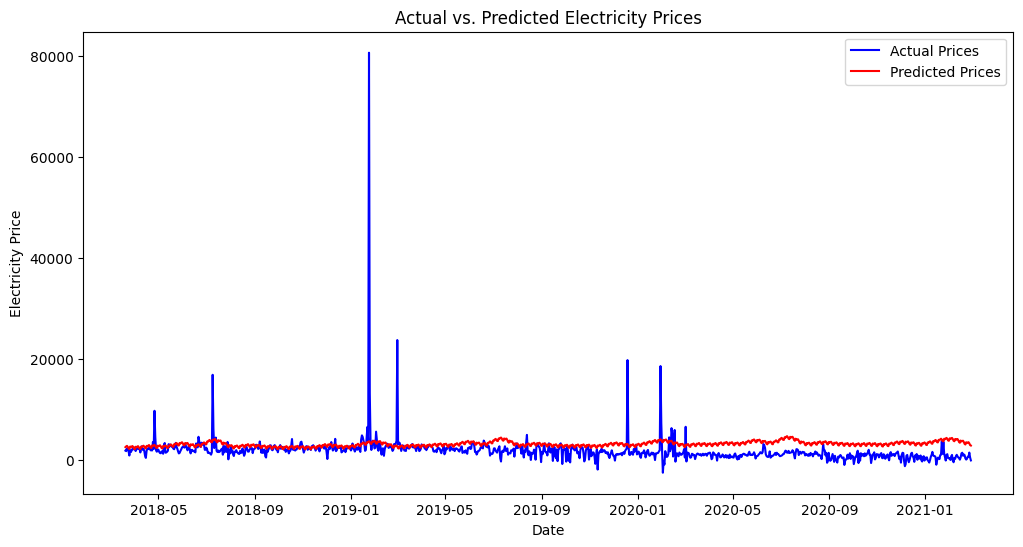

In [25]:
# Plotting actual and predicted electricity prices
plt.figure(figsize=(12, 6))
plt.plot(test_data['FullDate'], actual_prices, label='Actual Prices', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Electricity Price')
plt.title('Actual vs. Predicted Electricity Prices')
plt.legend()
plt.show()


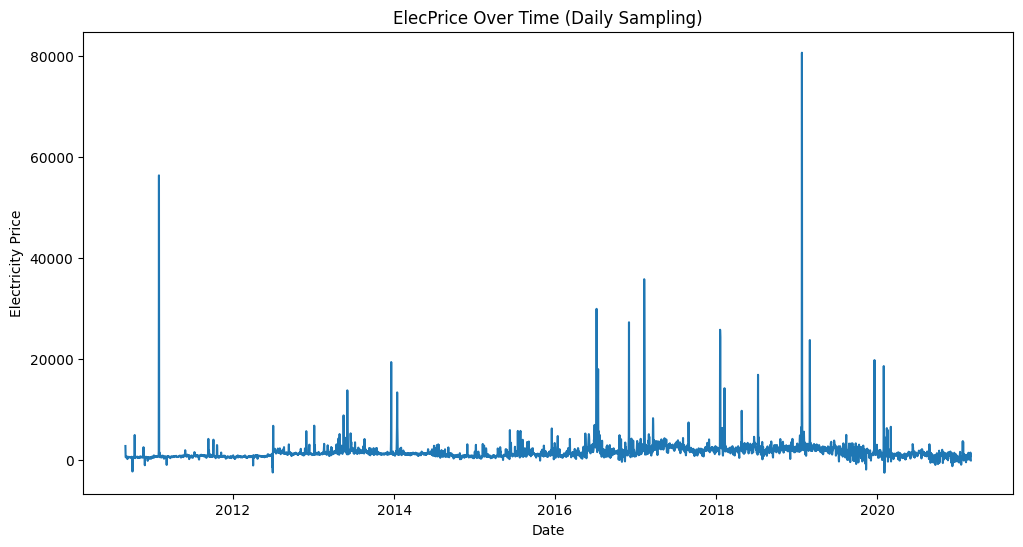

In [26]:
import pandas as pd

# Loading the dataset from the root directory
dataFile = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

# Converting the 'FullDate' column to a datetime object
dataFile['FullDate'] = pd.to_datetime(dataFile['FullDate'])

# Resampling the data from hourly to daily, summing the ElecPrice for each day
daily_data = dataFile.resample('D', on='FullDate').sum().reset_index()

# Plotting the ElecPrice over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['FullDate'], daily_data['ElecPrice'])
plt.xlabel('Date')
plt.ylabel('Electricity Price')
plt.title('ElecPrice Over Time (Daily Sampling)')
plt.show()


In [27]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Loading the dataset from the root directory
dataFile = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

# Converting the 'FullDate' column to a datetime object
dataFile['FullDate'] = pd.to_datetime(dataFile['FullDate'])

# Resampling the data from hourly to daily, summing the SysLoad and GasPrice for each day
daily_data = dataFile.resample('D', on='FullDate').sum().reset_index()

# Performing ADF test for SysLoad
result_sysload = adfuller(daily_data['SysLoad'])
p_value_sysload = result_sysload[1]

# Performing ADF test for GasPrice
result_gasprice = adfuller(daily_data['GasPrice'])
p_value_gasprice = result_gasprice[1]

print("P-value for SysLoad:", round(p_value_sysload, 6))
print("P-value for GasPrice:", round(p_value_gasprice, 6))


P-value for SysLoad: 0.004254
P-value for GasPrice: 0.045027


In [28]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Loading the dataset from the root directory
dataFile = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

# Converting the 'FullDate' column to a datetime object
dataFile['FullDate'] = pd.to_datetime(dataFile['FullDate'])

# Resampling the data from hourly to daily, summing the GasPrice and ElecPrice for each day
daily_data = dataFile.resample('D', on='FullDate').sum().reset_index()

# Performing ADF test for GasPrice
result_gasprice = adfuller(daily_data['GasPrice'])
critical_values_gasprice = result_gasprice[4]

# Performing ADF test for ElecPrice
result_elecprice = adfuller(daily_data['ElecPrice'])
critical_values_elecprice = result_elecprice[4]

# Extracting the critical values at 10% and 5% significance levels
critical_10_gasprice = critical_values_gasprice['10%']
critical_5_gasprice = critical_values_gasprice['5%']
critical_10_elecprice = critical_values_elecprice['10%']
critical_5_elecprice = critical_values_elecprice['5%']

print("GasPrice:")
print("10%:", round(critical_10_gasprice, 4))
print("5%:", round(critical_5_gasprice, 4))

print("\nElecPrice:")
print("10%:", round(critical_10_elecprice, 4))
print("5%:", round(critical_5_elecprice, 4))


GasPrice:
10%: -2.5672
5%: -2.8623

ElecPrice:
10%: -2.5672
5%: -2.8623


In [29]:
import pandas as pd
import numpy as np
from prophet import Prophet

# Loading the dataset from the root directory
dataFile = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

# Converting the 'FullDate' column to a datetime object
dataFile['FullDate'] = pd.to_datetime(dataFile['FullDate'])

# Resampling the data from hourly to daily, summing the 'ElecPrice' for each day
daily_data = dataFile.resample('D', on='FullDate').sum().reset_index()

# Splitting the data into train and test sets (2757 days for train and the rest for test)
train_data = daily_data.iloc[:2757]
test_data = daily_data.iloc[2757:]

# Initializing the Prophet model
model = Prophet()

# Creating a new DataFrame for Prophet model with columns 'ds' and 'y'
prophet_data = train_data[['FullDate', 'ElecPrice']].rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'})

# Fitting the model to the training data
model.fit(prophet_data)

# Ensuring that test_data is not empty or contains valid rows
if not test_data.empty:
    # Creating a DataFrame for making predictions on the test set
    test_dates = test_data['FullDate'].values
    forecast_data = pd.DataFrame({'ds': test_dates})

    # Making predictions on the test set using the trained model
    forecast = model.predict(forecast_data)

    # Extracting actual and predicted values from the forecast DataFrame
    actual_prices = test_data['ElecPrice'].values
    predicted_prices = forecast['yhat'].values[-len(test_data):]

    # Calculating MAPE function
    def calculate_mape(actual, predicted):
        return np.mean(np.abs((actual - predicted) / actual)) * 100

    # Calculating ElecPrice MAPE
    mape_elecprice = calculate_mape(actual_prices, predicted_prices)
    print("ElecPrice MAPE:", round(mape_elecprice, 2))
else:
    print("Test data is empty or contains no valid rows.")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/ywzx__m5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/al70bkxp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60707', 'data', 'file=/tmp/tmpblg7si5f/ywzx__m5.json', 'init=/tmp/tmpblg7si5f/al70bkxp.json', 'output', 'file=/tmp/tmpblg7si5f/prophet_modelorr2yqp9/prophet_model-20230801155642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:56:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:56:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ElecPrice MAPE: 544.09


In [30]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Loading the dataset from the root directory
dataFile = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

# Converting the 'FullDate' column to a datetime object
dataFile['FullDate'] = pd.to_datetime(dataFile['FullDate'])

# Resampling the data from hourly to daily, summing the 'ElecPrice' for each day
daily_data = dataFile.resample('D', on='FullDate').sum().reset_index()

# Splitting the data into train and test sets (2757 days for train and the rest for test)
train_data = daily_data.iloc[:2757]
test_data = daily_data.iloc[2757:]

# Initializing the Prophet model
model = Prophet()

# Creating a new DataFrame for Prophet model with columns 'ds' and 'y'
prophet_data = train_data[['FullDate', 'ElecPrice']].rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'})

# Fitting the model to the training data
model.fit(prophet_data)

# Ensuring that test_data is not empty or contains valid rows
if not test_data.empty:
    # Creating a DataFrame for making predictions on the test set
    test_dates = test_data['FullDate'].values
    forecast_data = pd.DataFrame({'ds': test_dates})

    # Making predictions on the test set using the trained model
    forecast = model.predict(forecast_data)

    # Extracting actual and predicted values from the forecast DataFrame
    actual_prices = test_data['ElecPrice'].values
    predicted_prices = forecast['yhat'].values[-len(test_data):]

    # Calculating RMSE
    rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
    print("RMSE:", round(rmse, 2))
else:
    print("Test data is empty or contains no valid rows.")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/_0v81fdd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/7vj08wk9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89355', 'data', 'file=/tmp/tmpblg7si5f/_0v81fdd.json', 'init=/tmp/tmpblg7si5f/7vj08wk9.json', 'output', 'file=/tmp/tmpblg7si5f/prophet_model9z2j4fqa/prophet_model-20230801155643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:56:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:56:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 3207.46


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/migfbltn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/7c23ppz2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66306', 'data', 'file=/tmp/tmpblg7si5f/migfbltn.json', 'init=/tmp/tmpblg7si5f/7c23ppz2.json', 'output', 'file=/tmp/tmpblg7si5f/prophet_modelg2do9mtg/prophet_model-20230801155644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:56:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:56:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


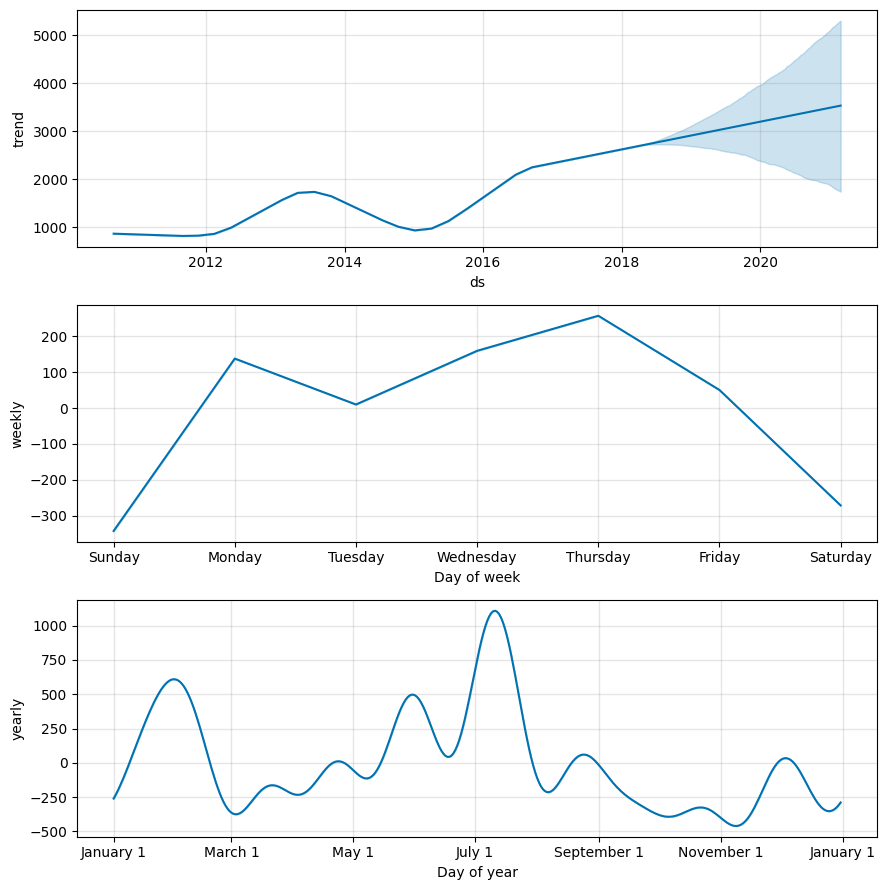

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Loading the dataset from the root directory
dataFile = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

# Converting the 'FullDate' column to a datetime object
dataFile['FullDate'] = pd.to_datetime(dataFile['FullDate'])

# Resampling the data from hourly to daily, summing the 'ElecPrice' for each day
daily_data = dataFile.resample('D', on='FullDate').sum().reset_index()

# Splitting the data into train and test sets (2757 days for train and the rest for test)
train_data = daily_data.iloc[:2757]
test_data = daily_data.iloc[2757:]

# Initializing the Prophet model
model = Prophet()

# Creating a new DataFrame for Prophet model with columns 'ds' and 'y'
prophet_data = train_data[['FullDate', 'ElecPrice']].rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'})

# Fitting the model to the training data
model.fit(prophet_data)

# Making future predictions
future = model.make_future_dataframe(periods=len(daily_data) - len(train_data))
forecast = model.predict(future)

# Plotting the components
fig = model.plot_components(forecast)
plt.show()


In [32]:
import pandas as pd
import numpy as np
from prophet import Prophet

# Loading the dataset from the root directory
dataFile = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

# Converting the 'FullDate' column to a datetime object
dataFile['FullDate'] = pd.to_datetime(dataFile['FullDate'])

# Resampling the data from hourly to daily, summing the 'ElecPrice' for each day
daily_data = dataFile.resample('D', on='FullDate').sum().reset_index()

# Splitting the data into train and test sets (2757 days for train and the rest for test)
train_data = daily_data.iloc[:2757]
test_data = daily_data.iloc[2757:]

# Initializing the Prophet model with additional regressors
model = Prophet(weekly_seasonality=False, daily_seasonality=False)

# Adding regressors to the model
model.add_regressor('SysLoad')
model.add_regressor('Tmax')
model.add_regressor('GasPrice')

# Creating a new DataFrame for Prophet model with columns 'ds', 'y', 'SysLoad', 'Tmax', and 'GasPrice'
prophet_train_data = pd.DataFrame({
    'ds': train_data['FullDate'],
    'y': train_data['ElecPrice'],
    'SysLoad': train_data['SysLoad'],
    'Tmax': train_data['Tmax'],
    'GasPrice': train_data['GasPrice']
})

# Fitting the model to the training data
model.fit(prophet_train_data)

# Ensuring that test_data is not empty or contains valid rows
if not test_data.empty:
    # Creating a DataFrame for making predictions on the test set
    prophet_test_data = pd.DataFrame({
        'ds': test_data['FullDate'],
        'y': test_data['ElecPrice'],
        'SysLoad': test_data['SysLoad'],
        'Tmax': test_data['Tmax'],
        'GasPrice': test_data['GasPrice']
    })

    # Making predictions on the test set using the trained model and regressors
    forecast = model.predict(prophet_test_data)

    # Extracting actual and predicted values from the forecast Data Frame
    actual_prices = test_data['ElecPrice'].values
    predicted_prices = forecast['yhat'].values[-len(test_data):]

    # Printing the forecast DataFrame for reference
    print(forecast[['ds', 'yhat', 'SysLoad', 'Tmax', 'GasPrice']])

else:
    print("Test data is empty or contains no valid rows.")


DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/h4igm39g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/pr0e7x2_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19199', 'data', 'file=/tmp/tmpblg7si5f/h4igm39g.json', 'init=/tmp/tmpblg7si5f/pr0e7x2_.json', 'output', 'file=/tmp/tmpblg7si5f/prophet_modelv85v9l88/prophet_model-20230801155647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:56:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:56:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds         yhat      SysLoad      Tmax     GasPrice
0    2018-03-20  2062.647922  -874.015082  0.172798  1103.541587
1    2018-03-21  1923.669491 -1047.529536  0.170748  1128.062495
2    2018-03-22  2757.535691  -219.385990  0.160814  1128.062495
3    2018-03-23  2630.170943  -280.558705  0.154980  1060.285999
4    2018-03-24  1538.893365 -1098.605442  0.153560   789.356424
...         ...          ...          ...       ...          ...
1072 2021-02-24   900.954171 -1400.602386  0.172956   115.825288
1073 2021-02-25  1164.372799 -1054.323142  0.174217    58.562793
1074 2021-02-26  1424.035422  -770.089044  0.172325    53.799739
1075 2021-02-27  1147.027322 -1031.837593  0.171221    52.317900
1076 2021-02-28  1261.737371  -932.361729  0.169960    75.180560

[1077 rows x 5 columns]


In [33]:
import pandas as pd

# Loading the dataset from the root directory
dataFile = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

# Converting the 'FullDate' column to a datetime object
dataFile['FullDate'] = pd.to_datetime(dataFile['FullDate'])

# Resampling the data from hourly to daily, summing the 'ElecPrice' for each day
daily_data = dataFile.resample('D', on='FullDate').sum().reset_index()

# Splitting the data into train and test sets (2757 days for train and the rest for test)
train_data = daily_data.iloc[:2757]
test_data = daily_data.iloc[2757:]

# Initializing the Prophet model with additional regressors
model = Prophet(weekly_seasonality=False, daily_seasonality=False)

# Adding regressors to the model
model.add_regressor('SysLoad')
model.add_regressor('Tmax')
model.add_regressor('GasPrice')

# Creating a new DataFrame for Prophet model with columns 'ds', 'y', 'SysLoad', 'Tmax', and 'GasPrice'
prophet_train_data = pd.DataFrame({
    'ds': train_data['FullDate'],
    'y': train_data['ElecPrice'],
    'SysLoad': train_data['SysLoad'],
    'Tmax': train_data['Tmax'],
    'GasPrice': train_data['GasPrice']
})

# Fitting the model to the training data
model.fit(prophet_train_data)

# Ensuring that test_data is not empty or contains valid rows
if not test_data.empty:
    # Creating a DataFrame for making predictions on the test set
    prophet_test_data = pd.DataFrame({
        'ds': test_data['FullDate'],
        'y': test_data['ElecPrice'],
        'SysLoad': test_data['SysLoad'],
        'Tmax': test_data['Tmax'],
        'GasPrice': test_data['GasPrice']
    })

    # Making predictions on the test set using the trained model and regressors
    forecast = model.predict(prophet_test_data)

    # Extracting actual and predicted values from the forecast DataFrame
    actual_prices = test_data['ElecPrice'].values
    predicted_prices = forecast['yhat'].values[-len(test_data):]

    # Calculating MAPE
    mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100

    # Printing the MAPE in 2 decimal places
    print("MAPE:", round(mape, 2))

else:
    print("Test data is empty or contains no valid rows.")


DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/kddfxemo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/5tlvzwax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35984', 'data', 'file=/tmp/tmpblg7si5f/kddfxemo.json', 'init=/tmp/tmpblg7si5f/5tlvzwax.json', 'output', 'file=/tmp/tmpblg7si5f/prophet_modelpjbri9oh/prophet_model-20230801155648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:56:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:56:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAPE: 236.66


In [34]:
import pandas as pd
import numpy as np
from prophet import Prophet

# Loading the dataset from the root directory
dataFile = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

# Converting the 'FullDate' column to a datetime object
dataFile['FullDate'] = pd.to_datetime(dataFile['FullDate'])

# Resampling the data from hourly to daily, summing the 'ElecPrice' for each day
daily_data = dataFile.resample('D', on='FullDate').sum().reset_index()

# Splitting the data into train and test sets (2757 days for train and the rest for test)
train_data = daily_data.iloc[:2757]
test_data = daily_data.iloc[2757:]

# Initializing the Prophet model with additional regressors
model = Prophet(weekly_seasonality=False, daily_seasonality=False)

# Adding regressors to the model
model.add_regressor('SysLoad')
model.add_regressor('Tmax')
model.add_regressor('GasPrice')

# Creating a new DataFrame for Prophet model with columns 'ds', 'y', 'SysLoad', 'Tmax', and 'GasPrice'
prophet_train_data = pd.DataFrame({
    'ds': train_data['FullDate'],
    'y': train_data['ElecPrice'],
    'SysLoad': train_data['SysLoad'],
    'Tmax': train_data['Tmax'],
    'GasPrice': train_data['GasPrice']
})

# Fitting the model to the training data
model.fit(prophet_train_data)

# Ensuring that test_data is not empty or contains valid rows
if not test_data.empty:
    # Creating a DataFrame for making predictions on the test set
    prophet_test_data = pd.DataFrame({
        'ds': test_data['FullDate'],
        'y': test_data['ElecPrice'],
        'SysLoad': test_data['SysLoad'],
        'Tmax': test_data['Tmax'],
        'GasPrice': test_data['GasPrice']
    })

    # Making predictions on the test set using the trained model and regressors
    forecast = model.predict(prophet_test_data)

    # Extracting actual and predicted values from the forecast DataFrame
    actual_prices = test_data['ElecPrice'].values
    predicted_prices = forecast['yhat'].values[-len(test_data):]

    # Calculating RMSE
    rmse = np.sqrt(np.mean((actual_prices - predicted_prices) ** 2))

    # Printing the RMSE in 2 decimal places
    print("RMSE:", round(rmse, 2))

else:
    print("Test data is empty or contains no valid rows.")


DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/hre7boov.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/e21e6bgi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18742', 'data', 'file=/tmp/tmpblg7si5f/hre7boov.json', 'init=/tmp/tmpblg7si5f/e21e6bgi.json', 'output', 'file=/tmp/tmpblg7si5f/prophet_modelgkpuikn5/prophet_model-20230801155649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:56:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:56:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 2710.96


DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/iyligkfl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/o8v60cr0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89847', 'data', 'file=/tmp/tmpblg7si5f/iyligkfl.json', 'init=/tmp/tmpblg7si5f/o8v60cr0.json', 'output', 'file=/tmp/tmpblg7si5f/prophet_model9rinzjeu/prophet_model-20230801155650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:56:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:56:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


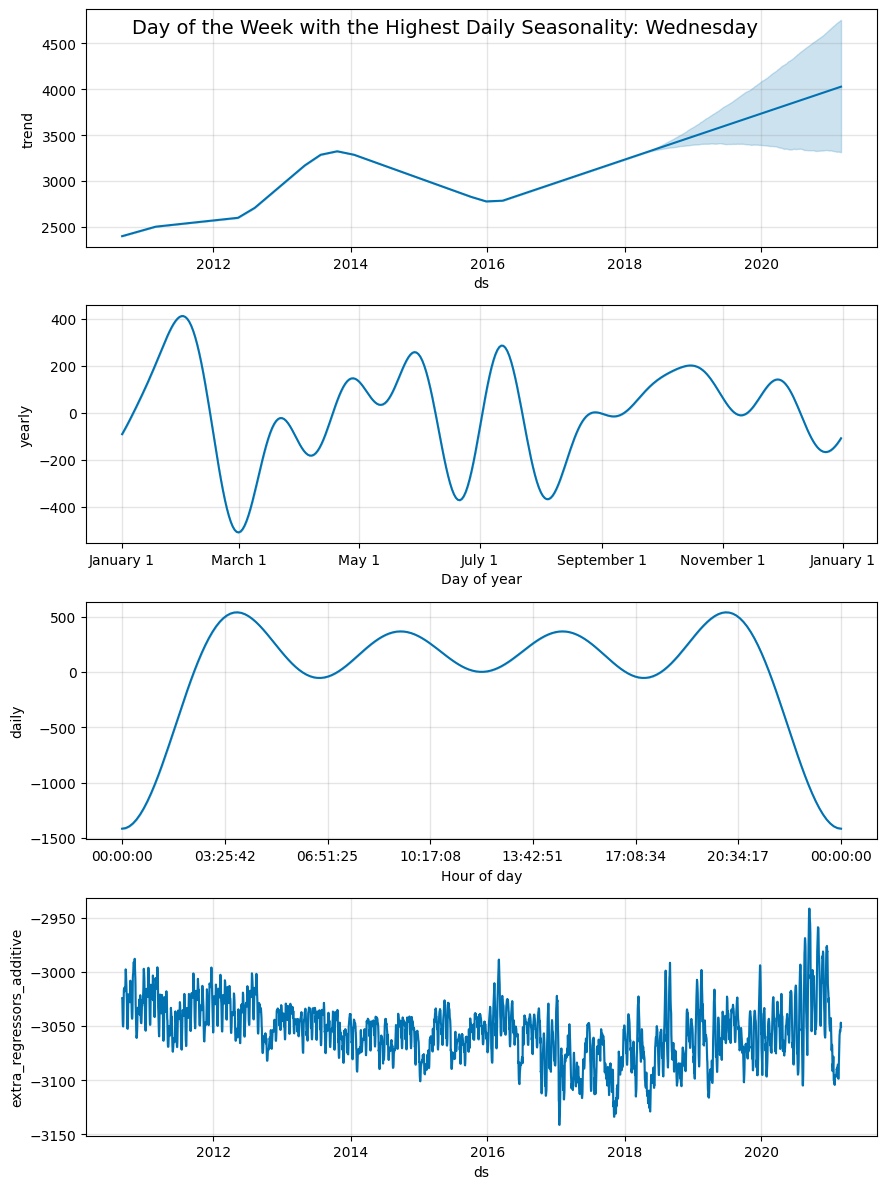

In [35]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Loading the dataset from the root directory
dataFile = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

# Converting the 'FullDate' column to a datetime object
dataFile['FullDate'] = pd.to_datetime(dataFile['FullDate'])

# Resampling the data from hourly to daily, summing the 'ElecPrice' for each day
daily_data = dataFile.resample('D', on='FullDate').sum().reset_index()

# Splitting the data into train and test sets (2757 days for train and the rest for test)
train_data = daily_data.iloc[:2757]
test_data = daily_data.iloc[2757:]

# Initializing the Prophet model with additional regressors
model = Prophet(weekly_seasonality=False, daily_seasonality=True)

# Adding regressors to the model
model.add_regressor('SysLoad')
model.add_regressor('Tmax')
model.add_regressor('GasPrice')

# Creating a new DataFrame for Prophet model with columns 'ds', 'y', 'SysLoad', 'Tmax', and 'GasPrice'
prophet_train_data = pd.DataFrame({
    'ds': train_data['FullDate'],
    'y': train_data['ElecPrice'],
    'SysLoad': train_data['SysLoad'],
    'Tmax': train_data['Tmax'],
    'GasPrice': train_data['GasPrice']
})

# Fitting the model to the training data
model.fit(prophet_train_data)

# Generating future dates for forecasting
future = model.make_future_dataframe(periods=len(test_data))

# Adding regressors for future dates
future['SysLoad'] = dataFile['SysLoad']
future['Tmax'] = dataFile['Tmax']
future['GasPrice'] = dataFile['GasPrice']

# Making predictions on future dates using the trained model and regressors
forecast = model.predict(future)

# Extracting the daily seasonality component from the forecast
daily_seasonality = forecast['daily']

# Finding the date with the highest value in the daily seasonality component
max_daily_seasonality_date = forecast.loc[daily_seasonality.idxmax(), 'ds']
day_with_highest_seasonality = max_daily_seasonality_date.day_name()

# Plotting the forecast components
fig = model.plot_components(forecast)

# Adding a title to the plot to show the day of the week with the highest daily seasonality value
plt.suptitle(f"Day of the Week with the Highest Daily Seasonality: {day_with_highest_seasonality}", fontsize=14)

plt.show()


In [36]:
import pandas as pd
import numpy as np
from prophet import Prophet

# Loading the dataset from the root directory
dataFile = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

# Converting the 'FullDate' column to a datetime object
dataFile['FullDate'] = pd.to_datetime(dataFile['FullDate'])

# Resampling the data from hourly to daily, summing the 'ElecPrice' for each day
daily_data = dataFile.resample('D', on='FullDate').sum().reset_index()

# Splitting the data into train and test sets (2757 days for train and the rest for test)
train_data = daily_data.iloc[:2757]
test_data = daily_data.iloc[2757:]

# Initializing the Prophet model with additional regressors
model = Prophet(weekly_seasonality=False, daily_seasonality=True)

# Adding regressors to the model
model.add_regressor('SysLoad')
model.add_regressor('Tmax')
model.add_regressor('GasPrice')

# Creating a new DataFrame for Prophet model with columns 'ds', 'y', 'SysLoad', 'Tmax', and 'GasPrice'
prophet_train_data = pd.DataFrame({
    'ds': train_data['FullDate'],
    'y': train_data['ElecPrice'],
    'SysLoad': train_data['SysLoad'],
    'Tmax': train_data['Tmax'],
    'GasPrice': train_data['GasPrice']
})

# Fitting the model to the training data
model.fit(prophet_train_data)

# Generating future dates for forecasting
future = model.make_future_dataframe(periods=len(test_data))

# Adding regressors for future dates
future['SysLoad'] = dataFile['SysLoad']
future['Tmax'] = dataFile['Tmax']
future['GasPrice'] = dataFile['GasPrice']

# Making predictions on future dates using the trained model and regressors
forecast = model.predict(future)

# Extracting the daily seasonality component from the forecast
daily_seasonality = forecast['daily']

# Finding the date with the highest value in the daily seasonality component
day_with_highest_seasonality = forecast.loc[daily_seasonality.idxmax(), 'ds'].day_name()

print("Day with the highest daily seasonality value:", day_with_highest_seasonality)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/s_skhn5a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/f2fdep2m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64641', 'data', 'file=/tmp/tmpblg7si5f/s_skhn5a.json', 'init=/tmp/tmpblg7si5f/f2fdep2m.json', 'output', 'file=/tmp/tmpblg7si5f/prophet_model8v92nzaw/prophet_model-20230801155653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:56:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:56:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Day with the highest daily seasonality value: Wednesday


In [37]:
import pandas as pd
import numpy as np
from prophet import Prophet

# Loading the dataset from the root directory
dataFile = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

# Converting the 'FullDate' column to a datetime object
dataFile['FullDate'] = pd.to_datetime(dataFile['FullDate'])

# Resampling the data from hourly to daily, summing the 'ElecPrice' for each day
daily_data = dataFile.resample('D', on='FullDate').sum().reset_index()

# Splitting the data into train and test sets (2757 days for train and the rest for test)
train_data = daily_data.iloc[:2757]
test_data = daily_data.iloc[2757:]

# Initializing the Prophet model with additional regressors (excluding 'Tmax')
model = Prophet(weekly_seasonality=False, daily_seasonality=True)
model.add_regressor('SysLoad')
model.add_regressor('GasPrice')

# Creating a new DataFrame for Prophet model with columns 'ds', 'y', 'SysLoad', and 'GasPrice' (exclude 'Tmax')
prophet_train_data = pd.DataFrame({
    'ds': train_data['FullDate'],
    'y': train_data['ElecPrice'],
    'SysLoad': train_data['SysLoad'],
    'GasPrice': train_data['GasPrice']
})

# Fitting the model to the training data
model.fit(prophet_train_data)

# Generating future dates for forecasting
future = model.make_future_dataframe(periods=len(test_data))

# Adding regressors for future dates (excluding 'Tmax')
future['SysLoad'] = dataFile['SysLoad']
future['GasPrice'] = dataFile['GasPrice']

# Making predictions on future dates using the trained model and regressors
forecast = model.predict(future)

# Extracting actual and predicted values from the forecast DataFrame
actual_values = test_data['ElecPrice'].values
predicted_values = forecast.iloc[-len(test_data):]['yhat'].values

# Calculating MAPE on the test set
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Printing the MAPE to 2 decimal places
print("MAPE on test set:", round(mape, 2))


DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/fur7b8pw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpblg7si5f/at3jughd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33090', 'data', 'file=/tmp/tmpblg7si5f/fur7b8pw.json', 'init=/tmp/tmpblg7si5f/at3jughd.json', 'output', 'file=/tmp/tmpblg7si5f/prophet_modelrji4cunf/prophet_model-20230801155655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:56:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:56:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAPE on test set: 207.2
